/tmp/ipykernel_72141/1532320263.py:7: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


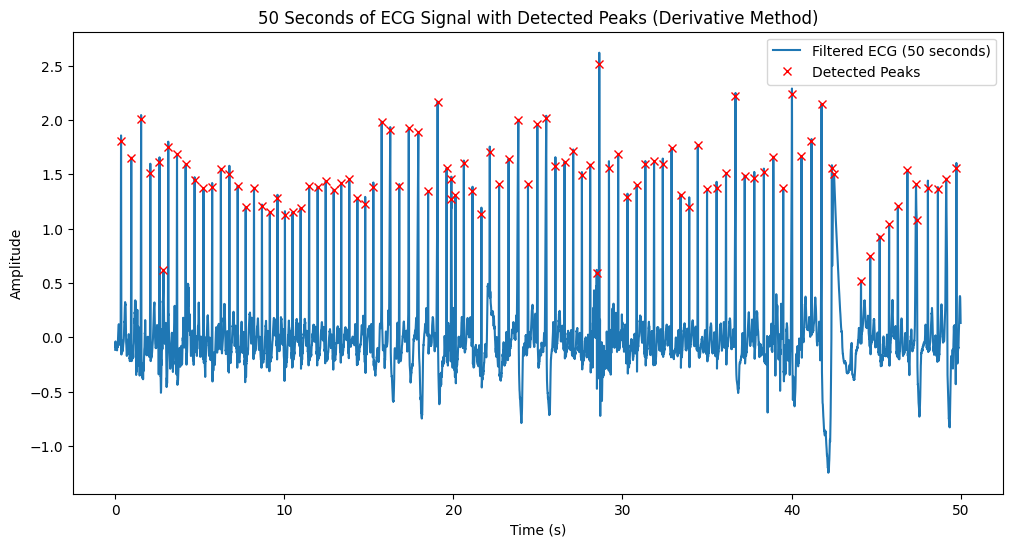

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.misc import electrocardiogram

# 1. Načtení ECG signálu
ecg = electrocardiogram()
fs = 360  # Sampling frequency (Hz)
time = np.arange(ecg.size) / fs  # Časová osa pro celý signál

# 2. Vybereme 50 sekund signálu
duration = 50  # Požadovaná délka signálu v sekundách
samples = int(duration * fs)  # Počet vzorků odpovídající 50 sekundám
ecg_50s = ecg[:samples]
time_50s = time[:samples]

# 3. Band-pass filtr (např. 0.5–50 Hz)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg_50s, 0.5, 50, fs)

# 4. Derivace signálu
# Numerická derivace (gradient) signálu
derivative = np.gradient(filtered_ecg)

# Hledáme body, kde derivace přechází z kladné na zápornou hodnotu
zero_crossings = np.where((derivative[:-1] > 0) & (derivative[1:] < 0))[0]

# 5. Filtrování nulových průchodů podle amplitudy (práh)
threshold = 0.5  # Nastavíme minimální amplitudu
peaks = zero_crossings[filtered_ecg[zero_crossings] > threshold]

# 6. Vizualizace pro 50 sekund signálu
plt.figure(figsize=(12, 6))
plt.plot(time_50s, filtered_ecg, label='Filtered ECG (50 seconds)')
plt.plot(time_50s[peaks], filtered_ecg[peaks], 'rx', label='Detected Peaks')
plt.title('50 Seconds of ECG Signal with Detected Peaks (Derivative Method)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
